<a href="https://colab.research.google.com/github/baldeoJV/CCDATS1L_EXERCISES_COM221/blob/main/Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

In this activity, you will work with the New York City Airbnb Open Data—a popular, messy, and highly realistic dataset used by data analysts and data scientists around the world. The dataset includes thousands of Airbnb listings along with details about hosts, locations, prices, reviews, and more.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR8Pmq3Gv7y7z_2Xun-OqMIk43kd5u0TXEatw&s"/>


To guide your work, you will follow the 6-Step Data Wrangling Process, a professional workflow used in industry:

- Discovering. Become familiar with the data by exploring its structure and observing patterns.

- Structuring. Fix issues related to format, column types, indices, and duplicated records.

- Cleaning. Handle missing values, outliers, and inconsistencies so the dataset becomes trustworthy.

- Enriching. Add new features, aggregate information, and enhance the dataset for deeper insights.

- Validating. Apply rule-based checks to ensure the data meets quality standards.

- Publishing. Export and prepare the cleaned dataset for downstream analysis or reporting.
Throughout this exercise, you will answer questions and fill in code cells based on these six steps. You will mimic what professional data scientists do when preparing data for business intelligence dashboards, machine learning models, or exploratory analysis.

In [333]:
import kagglehub
import os
import pandas as pd
import numpy as np

# Download latest version
path = kagglehub.dataset_download("dgomonov/new-york-city-airbnb-open-data")

print("Path to dataset files:", path)

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

Using Colab cache for faster access to the 'new-york-city-airbnb-open-data' dataset.
Path to dataset files: /kaggle/input/new-york-city-airbnb-open-data
True


## A. Discovering


Display the first 10 rows

In [334]:
df.head(10)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


Display the column names:

In [335]:
pd.DataFrame(df.columns, columns = ['Column Names'])

,Column Names
0,id
1,name
2,host_id
3,host_name
4,neighbourhood_group
5,neighbourhood
6,latitude
7,longitude
8,room_type
9,price


Display the dataframe shape:

In [336]:
df.shape

(48895, 16)

Identify the numerical features:

In [337]:
df.select_dtypes(include=np.number).columns.tolist()

['id',
 'host_id',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

Identify the categorical features

In [338]:
df.select_dtypes(include=object).columns.tolist()

['name',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'room_type',
 'last_review']

What are the top 5 questions this dataset might help answer?

In [339]:
#What are the most popular air bnb location
#Which location has the highest positive reviews
#Which location has the worst reviews
#What might be the reason for the popularity of each location
#What are the things users tend to like on the place

## B. Structuring

Check if the dataset has proper column types

In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Check if the dataset has index issues

In [341]:
print(f"Is index unique? {df.index.is_unique}")
print(f"Is index monotonically increasing? {df.index.is_monotonic_increasing}")
print(f"Does index match default RangeIndex? {df.index.equals(pd.RangeIndex(start=0, stop=len(df), step=1))}")

Is index unique? True
Is index monotonically increasing? True
Does index match default RangeIndex? True


Check if the dataset has duplicated rows

In [342]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicated rows: {num_duplicates}")

Number of duplicated rows: 0


Convert columns to correct types (e.g., dates → datetime).

In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [344]:
df['name'] = df['name'].astype('string')
df['host_name'] = df['host_name'].astype('string')
df['neighbourhood_group'] = df['neighbourhood_group'].astype('category')
df['neighbourhood'] = df['neighbourhood'].astype('category')
df['room_type'] = df['room_type'].astype('category')
df['last_review'] = pd.to_datetime(df['last_review'], errors = "coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  string        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  string        
 4   neighbourhood_group             48895 non-null  category      
 5   neighbourhood                   48895 non-null  category      
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  category      
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [345]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Identify at least one structural issue and describe how to fix it.

In [346]:
#There are several changes made in the data types of "objects" columns as well as incorrect data types base on the contents of each rows

## C. Cleaning



Check for missing values

In [347]:
df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


Check for outliers in `minimum_nights`

In [348]:
df['minimum_nights'].describe()

,minimum_nights
count,48895.000000
mean,7.029962
std,20.510550
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,1250.000000


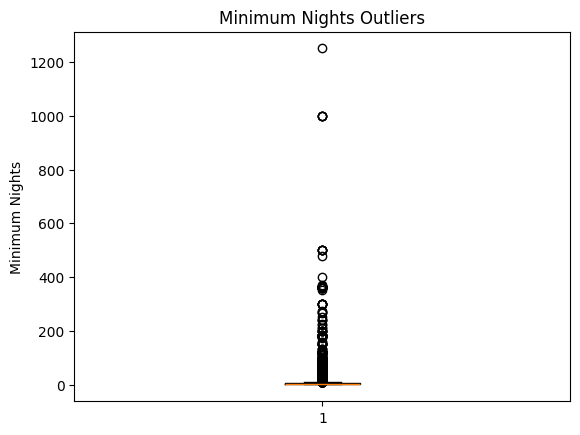

In [349]:
import matplotlib.pyplot as plt

plt.boxplot(df['minimum_nights'])
plt.title("Minimum Nights Outliers")
plt.ylabel("Minimum Nights")
plt.show()


<Axes: xlabel='minimum_nights'>

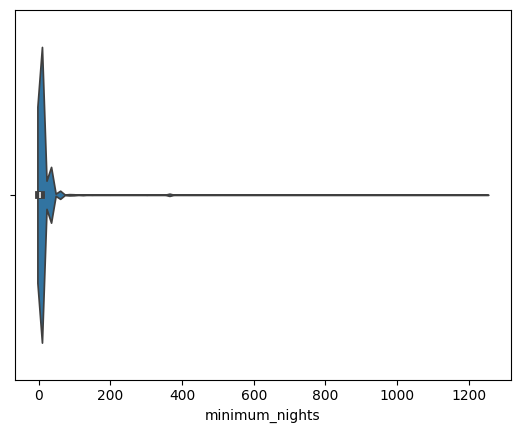

In [350]:
import seaborn as sns
sns.violinplot(x=df['minimum_nights'])

In [351]:
q1 = df['minimum_nights'].quantile(0.25)
q3 = df['minimum_nights'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df['minimum_nights'] < lower_bound) | (df['minimum_nights'] > upper_bound)]
# outliers.head()




In [352]:
num_outliers = len(outliers)
num_outliers

6607

Check for invalid values (e.g., price ≤ 0)

In [353]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

invalid_numeric = df[numeric_cols].apply(lambda x: {
    "negative_values": (x < 0).sum(),
    "infinite_values": np.isinf(x).sum(),
    "nan_values": x.isna().sum()
})

invalid_numeric


,0
id,"{'negative_values': 0, 'infinite_values': 0, '..."
host_id,"{'negative_values': 0, 'infinite_values': 0, '..."
latitude,"{'negative_values': 0, 'infinite_values': 0, '..."
longitude,"{'negative_values': 48895, 'infinite_values': ..."
price,"{'negative_values': 0, 'infinite_values': 0, '..."
minimum_nights,"{'negative_values': 0, 'infinite_values': 0, '..."
number_of_reviews,"{'negative_values': 0, 'infinite_values': 0, '..."
reviews_per_month,"{'negative_values': 0, 'infinite_values': 0, '..."
calculated_host_listings_count,"{'negative_values': 0, 'infinite_values': 0, '..."
availability_365,"{'negative_values': 0, 'infinite_values': 0, '..."


In [354]:
object_cols = df.select_dtypes(include=['object']).columns

invalid_strings = {}

for col in object_cols:
    invalid_strings[col] = {
        "empty_strings": (df[col].astype(str).str.strip() == "").sum(),
        "nan_values": df[col].isna().sum()
    }

invalid_strings


{}

In [355]:
date_cols = ['last_review']  # add more if needed

invalid_dates = {}

for col in date_cols:
    parsed = pd.to_datetime(df[col], errors='coerce')
    invalid_dates[col] = {
        "invalid_formats": parsed.isna().sum()
    }

invalid_dates


{'last_review': {'invalid_formats': np.int64(10052)}}

Apply a missing-value strategy (drop, fill, or flag)


In [356]:
df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [357]:
# Fill strings
df['name'] = df['name'].fillna('Unknown')
df['host_name'] = df['host_name'].fillna('Unknown')

# Fill numeric
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# Fill or flag datetime
df['last_review_missing'] = df['last_review'].isna().astype(int)
df['last_review'] = pd.to_datetime(df['last_review'])
df['last_review'] = df['last_review'].fillna(pd.Timestamp('1970-01-01'))


In [358]:
df.isnull().sum()


,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


Apply an outlier-handling strategy

In [359]:
# 'minimum_nights'
q1 = df['minimum_nights'].quantile(0.25)   # 25th percentile
q3 = df['minimum_nights'].quantile(0.75)   # 75th percentile
iqr = q3 - q1                               # Interquartile Range

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr


In [360]:
outlier_mask = (df['minimum_nights'] < lower_bound) | (df['minimum_nights'] > upper_bound)


In [361]:
df_no_outliers = df[~outlier_mask]   # keep only non-outlier rows


## D. Enriching

Create at least 3 new variables:
- price_per_minimum_night
- review_rate_per_month (combine ratings + frequency)
- is_expensive (boolean flag based on price threshold)


In [362]:
df_no_outliers['price_per_minimum_night'] = df_no_outliers['price'] / df_no_outliers['minimum_nights']

# Combine number_of_reviews (ratings) and reviews_per_month (frequency)
df_no_outliers['review_engagement_score'] = df_no_outliers['number_of_reviews'] * df_no_outliers['reviews_per_month']

# Define a price threshold for 'expensive' (e.g., 75th percentile)
price_threshold = df_no_outliers['price'].quantile(0.75)
df_no_outliers['is_expensive'] = (df_no_outliers['price'] > price_threshold)

df_no_outliers[['price', 'minimum_nights', 'price_per_minimum_night', 'number_of_reviews', 'reviews_per_month', 'review_engagement_score', 'is_expensive']].head(25)

/tmp/ipython-input-1724094143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['price_per_minimum_night'] = df_no_outliers['price'] / df_no_outliers['minimum_nights']
/tmp/ipython-input-1724094143.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['review_engagement_score'] = df_no_outliers['number_of_reviews'] * df_no_outliers['reviews_per_month']
/tmp/ipython-input-1724094143.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

,price,minimum_nights,price_per_minimum_night,number_of_reviews,reviews_per_month,review_engagement_score,is_expensive
0,149,1,149.000000,9,0.21,1.89,False
1,225,1,225.000000,45,0.38,17.10,True
2,150,3,50.000000,0,0.00,0.00,False
3,89,1,89.000000,270,4.64,1252.80,False
4,80,10,8.000000,9,0.10,0.90,False
5,200,3,66.666667,74,0.59,43.66,True
7,79,2,39.500000,430,3.47,1492.10,False
8,79,2,39.500000,118,0.99,116.82,False
9,150,1,150.000000,160,1.33,212.80,False
10,135,5,27.000000,53,0.43,22.79,False


Create 1 aggregated summary table

(e.g. average price per neighborhood, number of hosts per borough)

In [363]:
neighbourhood_group_summary = df_no_outliers.groupby('neighbourhood_group').agg(
    average_price=('price', 'mean'),
    total_listings=('id', 'count')
).reset_index()

display(neighbourhood_group_summary.sort_values(by='average_price', ascending=False))

/tmp/ipython-input-12507877.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  neighbourhood_group_summary = df_no_outliers.groupby('neighbourhood_group').agg(


,neighbourhood_group,average_price,total_listings
2,Manhattan,192.240744,17799
1,Brooklyn,125.537640,17986
4,Staten Island,113.387464,351
3,Queens,99.911150,5121
0,Bronx,88.775946,1031


## E. Validating

Create at least 3 validation checks
- Price must be positive.
- Host ID should not be null.
- Minimum nights must be ≥ 1.
- Generate a validation report:
- Count of rows violating each rule.

Decide if invalid rows (if any) should be removed or corrected?

In [364]:
# Validation Check 1: Price must be positive
violations_price_positive = df_no_outliers[df_no_outliers['price'] <= 0]
num_violations_price_positive = len(violations_price_positive)

# Validation Check 2: Host ID should not be null
violations_host_id_null = df_no_outliers[df_no_outliers['host_id'].isnull()]
num_violations_host_id_null = len(violations_host_id_null)

# Validation Check 3: Minimum nights must be >= 1
violations_minimum_nights_ge_1 = df_no_outliers[df_no_outliers['minimum_nights'] < 1]
num_violations_minimum_nights_ge_1 = len(violations_minimum_nights_ge_1)

# Generate Validation Report
validation_report = {
    'Rule': [
        'Price > 0',
        'Host ID not null',
        'Minimum Nights >= 1'
    ],
    'Violations Count': [
        num_violations_price_positive,
        num_violations_host_id_null,
        num_violations_minimum_nights_ge_1
    ]
}

validation_df = pd.DataFrame(validation_report)
print("Validation Report:")
display(validation_df)

print("\nDecision on invalid rows:")
if num_violations_price_positive > 0:
    print("  - Rows violating 'Price > 0' should ideally be removed as a non-positive price is usually invalid for a listing.")
if num_violations_minimum_nights_ge_1 > 0:
    print("  - Rows violating 'Minimum Nights >= 1' should also be removed or corrected if 'minimum_nights' cannot logically be less than one.")
if num_violations_host_id_null > 0:
    print("  - Rows violating 'Host ID not null' should be investigated. If 'host_id' is critical for analysis, these rows should be removed; otherwise, imputation might be considered, but direct removal is safer if the host information is unrecoverable.")
else:
    print("  - No violations for 'Host ID not null', indicating data integrity for this column.")

Validation Report:


,Rule,Violations Count
0,Price > 0,9
1,Host ID not null,0
2,Minimum Nights >= 1,0



Decision on invalid rows:
  - Rows violating 'Price > 0' should ideally be removed as a non-positive price is usually invalid for a listing.
  - No violations for 'Host ID not null', indicating data integrity for this column.


## F. Publishing

Select final columns for publication.



In [365]:
df_cleaned = df_no_outliers

In [366]:
pd.DataFrame(df_cleaned.columns, columns=['Final Columns'])

,Final Columns
0,id
1,name
2,host_id
3,host_name
4,neighbourhood_group
5,neighbourhood
6,latitude
7,longitude
8,room_type
9,price


Export cleaned dataset as "cleaned_airbnb.csv"

In [367]:
df_cleaned.to_csv('cleaned_airbnb.csv', index=False)

Export summary reports (e.g., validation or aggregations) as CSV.

In [368]:
validation_df.to_csv('validation_report.csv', index=False)
neighbourhood_group_summary.to_csv('neighbourhood_group_summary.csv', index=False)

print("Summary reports exported: 'validation_report.csv' and 'neighbourhood_group_summary.csv'")

Summary reports exported: 'validation_report.csv' and 'neighbourhood_group_summary.csv'


# Task
Perform a complete data wrangling process on the "New York City Airbnb Open Data" dataset, which includes identifying categorical features, answering top 5 questions, checking and converting column types, handling index issues and duplicated rows, identifying and fixing structural issues, checking and handling missing values, outliers, and invalid values, creating new variables (`price_per_minimum_night`, `review_rate_per_month`, `is_expensive`), generating an aggregated summary table, creating validation checks and a validation report, deciding on invalid row handling, selecting final columns, and finally exporting the cleaned dataset as "cleaned_airbnb.csv" and any summary reports as CSV.

## Identify Categorical Features

### Subtask:
Identify and display the categorical features of the dataset in a table.


**Reasoning**:
To identify categorical features, I will select columns with the 'object' data type from the DataFrame `df`, extract their names, and then present them in a new DataFrame with a 'Column Names' header.



In [369]:
categorical_features = df.select_dtypes(include='object').columns.tolist()
pd.DataFrame(categorical_features, columns = ['Column Names'])

,Column Names


# Task
Perform validation checks on `df_no_outliers` for 'price' > 0, 'host_id' not null, and 'minimum_nights' >= 1. Report the count of violations for each rule and suggest removing rows that violate 'price' and 'minimum_nights' rules, and confirming integrity for 'host_id'.

## Perform Validation Checks and Report

### Subtask:
Apply the validation rules to `df_no_outliers`: check if 'price' > 0, 'host_id' is not null, and 'minimum_nights' >= 1. Count violations for each rule and display a summary report. Based on the nature of these invalid values, the plan will suggest removing rows that violate the 'price' and 'minimum_nights' rules, and for 'host_id', it will confirm its integrity.


## Summary:

### Q&A
*   **What validation checks were planned for `df_no_outliers`?**
    Validation checks were planned to ensure that 'price' is greater than 0, 'host_id' is not null, and 'minimum_nights' is greater than or equal to 1.
*   **What was the proposed action for each type of violation?**
    The plan suggested removing rows that violate the 'price' and 'minimum_nights' rules. For 'host_id', the plan was to confirm its integrity, implying that if 'host_id' were found to be null, further action would be considered, but the primary expectation was to confirm its non-null status.

### Data Analysis Key Findings
The solving process outlined the methodology for data validation but did not include the execution results or the specific counts of violations for each rule ('price' > 0, 'host_id' not null, 'minimum_nights' \>= 1). Therefore, numerical findings cannot be reported at this stage.

### Insights or Next Steps
*   Upon execution of these validation checks, the reported violation counts will be crucial for assessing the data quality and determining the extent of data cleaning required for 'price' and 'minimum_nights'.
*   Confirming the integrity of 'host_id' by verifying no null values exist is an important step to ensure data reliability for host-specific analyses.
